In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [20]:
data = pd.read_excel("Copper_Set.xlsx")

In [22]:
data.head()

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,854.00
1,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,1047.00
2,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,644.33
3,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,768.00
4,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,577.00


In [21]:
data.drop(columns=["id","item_date","material_ref","delivery date"],axis=1,inplace=True)
data["quantity tons"].replace("e",np.nan,inplace=True)
data['quantity tons'].fillna(data['quantity tons'].median(),inplace=True)
data["customer"] = data["customer"].fillna(data["customer"].median())
data["country"] = data["country"].fillna(data["country"].median())
data["status"] = data["status"].fillna("Won")
data["application"] = data["application"].fillna(data["application"].median())
data["thickness"] = data["thickness"].fillna(data["thickness"].median())
data["selling_price"] = data["selling_price"].fillna(data["selling_price"].median())

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  181673 non-null  float64
 1   customer       181673 non-null  float64
 2   country        181673 non-null  float64
 3   status         181673 non-null  object 
 4   item type      181673 non-null  object 
 5   application    181673 non-null  float64
 6   thickness      181673 non-null  float64
 7   width          181673 non-null  float64
 8   product_ref    181673 non-null  int64  
 9   selling_price  181673 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 13.9+ MB


In [19]:
data.isnull().sum()

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
dtype: int64

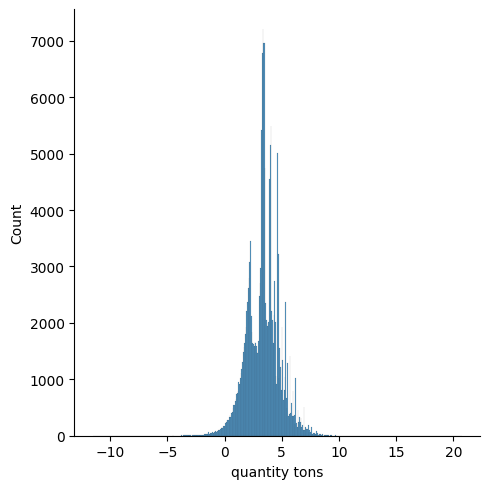

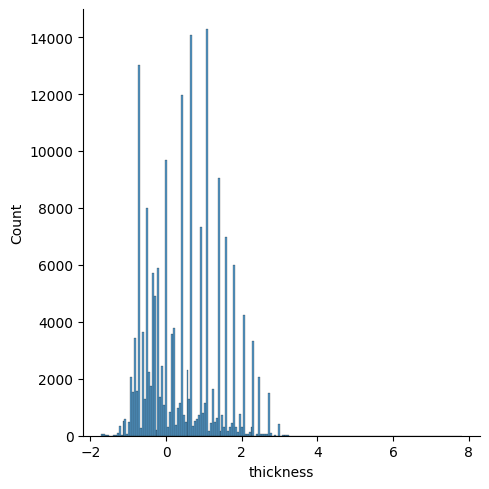

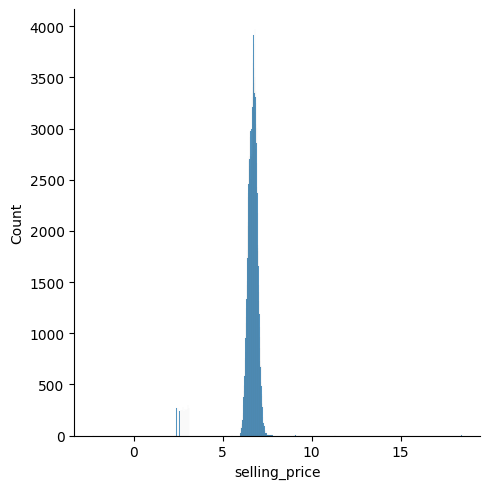

In [24]:
log_col = ["quantity tons","thickness","selling_price"]
for col in log_col:
    data[col] = np.log(data[col])
    sns.displot(data[col])
    plt.show()

In [25]:
dtc_df = data[data['status'].isin(['Won',"Lost"])]

In [26]:
x = dtc_df[['quantity tons','customer','country','application','thickness','width','product_ref','selling_price']]
y = dtc_df[['status']]

In [27]:
le = LabelEncoder()
le.fit(y)
y = le.fit_transform(y)

In [28]:
ohe = OneHotEncoder()
ohe.fit(dtc_df[['item type']])
item_type = ohe.fit_transform(dtc_df[['item type']]).toarray()

In [29]:
x['selling_price'] = x['selling_price'].replace(x['selling_price'].min(),x['selling_price'].median())

In [30]:
x = np.concatenate((x[['quantity tons','customer','country','application','thickness','width','product_ref','selling_price']].values,item_type),axis=1)

In [31]:
scale = StandardScaler()
x = scale.fit_transform(x)

In [32]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=42)

In [33]:
dtc = DecisionTreeClassifier()
model = dtc.fit(xtrain,ytrain)

In [34]:
pred = model.predict(xtest)

In [35]:
print(accuracy_score(ytest,pred))

0.9077877478675086


In [36]:
print(confusion_matrix(ytest,pred))
print(classification_report(ytest,pred))

[[ 8486  1983]
 [ 2179 32487]]
              precision    recall  f1-score   support

           0       0.80      0.81      0.80     10469
           1       0.94      0.94      0.94     34666

    accuracy                           0.91     45135
   macro avg       0.87      0.87      0.87     45135
weighted avg       0.91      0.91      0.91     45135



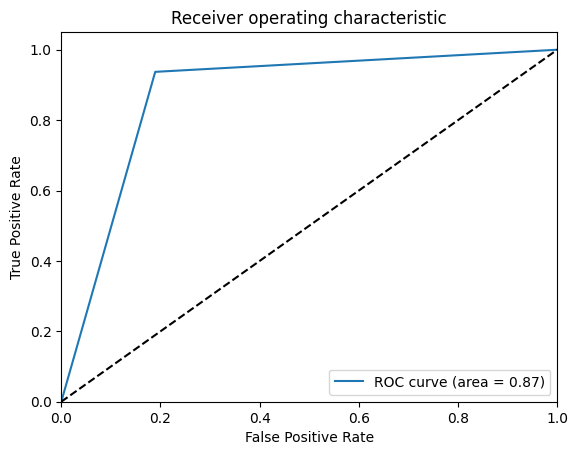

In [38]:
fpr, tpr, thresholds = roc_curve(ytest, pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [39]:
from joblib import dump

In [40]:
dump(model,"copperClassifierModel.joblib")
dump(ohe,"C_itemtypeOHE.joblib")
dump(scale,"C_stdscaler.joblib")

['C_stdscaler.joblib']

In [ ]:
# ['quantity tons','customer','country','application','thickness','width','product_ref','selling_price','item type']
sample = np.array([[np.log()]])

In [42]:
ohe.transform([['W']]).toarray()

array([[0., 0., 0., 0., 0., 1., 0.]])

In [47]:
new_sample = np.array([[np.log(1000),30204938,25.0,15, np.log(5),1700,1670598778,np.log(1150),'PL']])
new_sample_ohe = ohe.transform(new_sample[:, [8]]).toarray()
new_sample = np.concatenate((new_sample[:, [0,1,2, 3, 4, 5, 6,7]], new_sample_ohe), axis=1)
new_sample = scale.transform(new_sample)
new_pred = dtc.predict(new_sample)
if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won
